# Analyse RFM des Données Clients


Ce notebook présente une analyse RFM (Récence, Fréquence, Monétaire) pour le fichier `customer_details_v3.csv`. 
Les analyses incluent le calcul des métriques RFM, la segmentation des clients, et l'attribution des scores RFM.
La date de référence utilisée pour cette analyse est le 17 octobre 2018.


In [1]:

import pandas as pd
from datetime import datetime

# Charger les données
file_path = 'customer_details_v3.csv'
customer_data = pd.read_csv(file_path)

# Afficher les premières lignes du dataframe pour comprendre sa structure
customer_data.head()


customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  geolocation_lat  geolocation_lng          first_order  \
0             SP       -23.353453       -46.823060  2018-05-10 10:56:27   
1             SP       -23.568119       -46.792981  2018-05-07 11:11:27   
2             SC       -27.561522       -48.637354  2017-03-10 21:05:03   
3             PA        -1.449059       -48.495507  2017-10-12 20:29:41   
4             SP       -23.514883       -47.469016  2017-11-14 19:45:42   

            last_order  total_orders  connection_days  total_spent  \
0  2018-05-10 10:56:27             1                1       141.90   
1  2018-05-07 11:11:27             1                1        27.19   
2  2017-03-10 21:05:03             1                1        86.22   
3  2017-10-12 20:29:41             1                1        43.62   
4  2017-11-14 19:45:42             1                1       196.89   

   avg_review_score  avg_freight_value  avg_price  avg_payment  \
0               5.0              12.00     129.90       141.90   
1               4.0               8.29      18.90        27.19   
2               3.0              17.22      69.00        86.22   
3               4.0              17.63      25.99        43.62   
4               5.0              16.89     180.00       196.89   

   avg_product_weight_g  avg_product_length_cm  avg_product_height_cm  \
0                1500.0                   34.0                    7.0   
1                 375.0                   26.0                   11.0   
2                1500.0                   25.0                   50.0   
3                 150.0                   19.0                    5.0   
4                6050.0                   16.0                    3.0   

   avg_product_width_cm  
0                  32.0  
1                  18.0  
2                  35.0  
3                  11.0  
4                  11.0

## Calcul des Métriques RFM

In [2]:

# Redéfinir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# Sélectionner les colonnes nécessaires pour l'analyse RFM
rfm_data = customer_data[['customer_unique_id', 'recency', 'frequency', 'monetary']]

# S'assurer que les colonnes sont de type numérique
rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
rfm_data['monetary'] = pd.to_numeric(rfm_data['monetary'], errors='coerce')

# Afficher les premières lignes des données RFM
rfm_data.head()


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/115856898.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/115856898.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/115856898.py:20: SettingWithCopyWarning

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19
2  0000f46a3911fa3c0805444483337064      585          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89

## Segmentation et Attribution des Scores RFM

In [3]:

# Calcul des seuils des quantiles
quantiles = rfm_data.quantile(q=[0.33, 0.66], numeric_only=True)

# Fonction pour attribuer des scores basés sur les quantiles
def rfm_score(value, quantiles):
    if value <= quantiles[0.33]:
        return 1
    elif value <= quantiles[0.66]:
        return 2
    else:
        return 3

# Attribuer les scores RFM
rfm_data['R'] = rfm_data['recency'].apply(rfm_score, quantiles=quantiles['recency'])
rfm_data['F'] = rfm_data['frequency'].apply(rfm_score, quantiles=quantiles['frequency'])
rfm_data['M'] = rfm_data['monetary'].apply(rfm_score, quantiles=quantiles['monetary'])

# Créer le score RFM combiné
rfm_data['RFM_Score'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

# Afficher les résultats
rfm_data.head()


/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/3084580219.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['R'] = rfm_data['recency'].apply(rfm_score, quantiles=quantiles['recency'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/3084580219.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['F'] = rfm_data['frequency'].apply(rfm_score, quantiles=quantiles['frequency'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/3084580219.py:1

customer_unique_id  recency  frequency  monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90  1  1  2   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19  1  1  1   
2  0000f46a3911fa3c0805444483337064      585          1     86.22  3  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89  2  1  3   

  RFM_Score  
0       112  
1       111  
2       312  
3       311  
4       213

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/2270896181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['R'] = pd.to_numeric(rfm_data['R'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/2270896181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['F'] = pd.to_numeric(rfm_data['F'])
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_61456/2270896181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

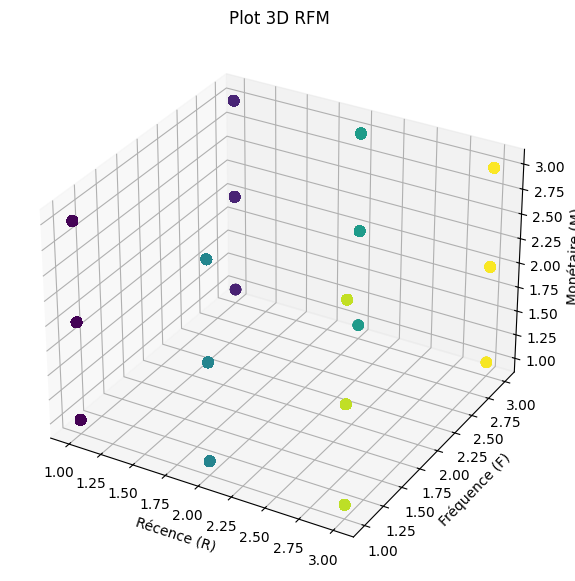

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convertir les scores RFM en numérique pour le plot 3D
rfm_data['R'] = pd.to_numeric(rfm_data['R'])
rfm_data['F'] = pd.to_numeric(rfm_data['F'])
rfm_data['M'] = pd.to_numeric(rfm_data['M'])

# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot des données
ax.scatter(rfm_data['R'], rfm_data['F'], rfm_data['M'], c=rfm_data['RFM_Score'].astype(int), cmap='viridis', s=50)
ax.set_xlabel('Récence (R)')
ax.set_ylabel('Fréquence (F)')
ax.set_zlabel('Monétaire (M)')
ax.set_title('Plot 3D RFM')

plt.show()

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  geolocation_lat  geolocation_lng          first_order  \
0             SP       -23.353453       -46.823060  2018-05-10 10:56:27   
1             SP       -23.568119       -46.792981  2018-05-07 11:11:27   
2             SC       -27.561522       -48.637354  2017-03-10 21:05:03   
3             PA        -1.449059       -48.495507  2017-10-12 20:29:41   
4             SP       -23.514883       -47.469016  2017-11-14 19:45:42   

            last_order  total_orders  connection_days  total_spent  \
0  2

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/3344305723.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/3344305723.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/3344305723.py:32: SettingWithCopyWarn

                 customer_unique_id  recency  frequency  monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90  1  1  2   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19  1  1  1   
2  0000f46a3911fa3c0805444483337064      585          1     86.22  3  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62  3  1  1   
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89  2  1  3   

  RFM_Score  
0       112  
1       111  
2       312  
3       311  
4       213  


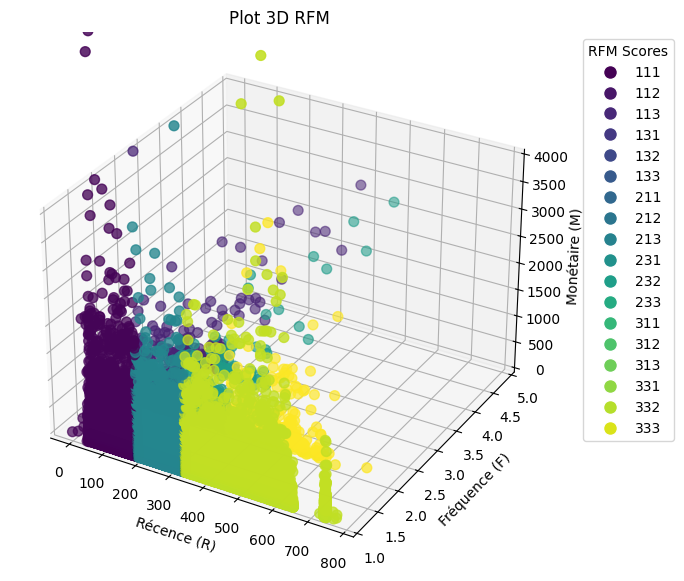

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Afficher les premières lignes du dataframe pour comprendre sa structure
print(customer_data.head())

# Redéfinir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# Sélectionner les colonnes nécessaires pour l'analyse RFM
rfm_data = customer_data[['customer_unique_id', 'recency', 'frequency', 'monetary']]

# S'assurer que les colonnes sont de type numérique
rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
rfm_data['monetary'] = pd.to_numeric(rfm_data['monetary'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
rfm_data['recency'].fillna(rfm_data['recency'].mean(), inplace=True)
rfm_data['frequency'].fillna(rfm_data['frequency'].mean(), inplace=True)
rfm_data['monetary'].fillna(rfm_data['monetary'].mean(), inplace=True)

# Afficher les premières lignes des données RFM
print(rfm_data.head())

# Calcul des seuils des quantiles
quantiles = rfm_data.quantile(q=[0.33, 0.66], numeric_only=True)

# Fonction pour attribuer des scores basés sur les quantiles
def rfm_score(value, quantiles):
    if value <= quantiles[0.33]:
        return 1
    elif value <= quantiles[0.66]:
        return 2
    else:
        return 3

# Attribuer les scores RFM
rfm_data['R'] = rfm_data['recency'].apply(rfm_score, quantiles=quantiles['recency'])
rfm_data['F'] = rfm_data['frequency'].apply(rfm_score, quantiles=quantiles['frequency'])
rfm_data['M'] = rfm_data['monetary'].apply(rfm_score, quantiles=quantiles['monetary'])

# Créer le score RFM combiné
rfm_data['RFM_Score'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

# Afficher les résultats
print(rfm_data.head())

# Création du plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Définir les limites des axes manuellement
ax.set_ylim(1, 5)
ax.set_zlim(0, 4000)

# Plot des données
scatter = ax.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['monetary'], c=rfm_data['RFM_Score'].astype(int), cmap='viridis', s=50)
ax.set_xlabel('Récence (R)')
ax.set_ylabel('Fréquence (F)')
ax.set_zlabel('Monétaire (M)')
ax.set_title('Plot 3D RFM')

# Ajouter une légende personnalisée et la placer à l'extérieur du plot
unique_scores = sorted(rfm_data['RFM_Score'].unique())
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / len(unique_scores)), markersize=10) for i in range(len(unique_scores))]
legend = ax.legend(handles, unique_scores, title="RFM Scores", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [17]:
import pandas as pd
from datetime import datetime
import plotly.express as px

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Afficher les premières lignes du dataframe pour comprendre sa structure
print(customer_data.head())

# Redéfinir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# Sélectionner les colonnes nécessaires pour l'analyse RFM
rfm_data = customer_data[['customer_unique_id', 'recency', 'frequency', 'monetary']]

# S'assurer que les colonnes sont de type numérique
rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
rfm_data['monetary'] = pd.to_numeric(rfm_data['monetary'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
rfm_data['recency'].fillna(rfm_data['recency'].mean(), inplace=True)
rfm_data['frequency'].fillna(rfm_data['frequency'].mean(), inplace=True)
rfm_data['monetary'].fillna(rfm_data['monetary'].mean(), inplace=True)

# Supprimer les fréquences supérieures à 4 et les montants supérieurs à 2500
rfm_filtered = rfm_data[(rfm_data['frequency'] <= 4) & (rfm_data['monetary'] <= 2500)]

# Fonction pour attribuer des scores basés sur les quantiles
quantiles = rfm_filtered.quantile(q=[0.33, 0.66], numeric_only=True)

def rfm_score(value, quantiles):
    if value <= quantiles[0.33]:
        return 1
    elif value <= quantiles[0.66]:
        return 2
    else:
        return 3

# Attribuer les scores RFM
rfm_filtered['R'] = rfm_filtered['recency'].apply(rfm_score, quantiles=quantiles['recency'])
rfm_filtered['F'] = rfm_filtered['frequency'].apply(rfm_score, quantiles=quantiles['frequency'])
rfm_filtered['M'] = rfm_filtered['monetary'].apply(rfm_score, quantiles=quantiles['monetary'])

# Créer le score RFM combiné
rfm_filtered['RFM_Score'] = rfm_filtered['R'].astype(str) + rfm_filtered['F'].astype(str) + rfm_filtered['M'].astype(str)

# Convertir les scores RFM en catégories ordonnées
rfm_filtered['RFM_Score'] = pd.Categorical(rfm_filtered['RFM_Score'], 
                                           categories=sorted(rfm_filtered['RFM_Score'].unique(), key=lambda x: (int(x[0]), int(x[1]), int(x[2]))), 
                                           ordered=True)

# Création du plot 3D avec Plotly
fig = px.scatter_3d(rfm_filtered, x='recency', y='frequency', z='monetary',
                    color='RFM_Score', title='Plot 3D RFM (Filtered Frequency <= 4 and Monetary <= 2500)',
                    width=1200, height=800)

# Mettre à jour les axes pour afficher uniquement des entiers sur l'axe de la fréquence
fig.update_layout(
    scene=dict(
        yaxis=dict(tickmode='linear', dtick=1),
        xaxis_title='Récence (R)',
        yaxis_title='Fréquence (F)',
        zaxis_title='Monétaire (M)'
    )
)

fig.show()

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  0000366f3b9a7992bf8c76cfdf3221e2                      7787       cajamar   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                      6053        osasco   
2  0000f46a3911fa3c0805444483337064                     88115      sao jose   
3  0000f6ccb0745a6a4b88665a16c9f078                     66812         belem   
4  0004aac84e0df4da2b147fca70cf8255                     18040      sorocaba   

  customer_state  geolocation_lat  geolocation_lng          first_order  \
0             SP       -23.353453       -46.823060  2018-05-10 10:56:27   
1             SP       -23.568119       -46.792981  2018-05-07 11:11:27   
2             SC       -27.561522       -48.637354  2017-03-10 21:05:03   
3             PA        -1.449059       -48.495507  2017-10-12 20:29:41   
4             SP       -23.514883       -47.469016  2017-11-14 19:45:42   

            last_order  total_orders  connection_days  total_spent  \
0  2

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/1142434496.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/1142434496.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_24923/1142434496.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th